In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RandomizedLasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [40]:
# loading datasets
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [41]:
# get numerical columns

# drop unnecessary columns 'Id', 'PID'
# drop target column 'SalePrice'
numerical_features = list(train._get_numeric_data().drop(['Id', 'PID', 'SalePrice'], axis=1))
features = numerical_features

# replace missing numerical values with -999
for feature in numerical_features:
    train[feature] = train[feature].fillna(-999)
    test[feature] = test[feature].fillna(-999)
    
# First extract the target variable which is our House prices
Y = train['SalePrice']
# Drop price from the house dataframe and create a matrix out of the house data
train = train[features]
X = train.values
# Store the column/feature names into a list "colnames"
colnames = train.columns

In [42]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [43]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [44]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

In [45]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [46]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50building tree 5 of 50building tree 6 of 50building tree 7 of 50building tree 8 of 50







building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50building tree 14 of 50

building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50building tree 29 of 50

building tree 30 of 50building tree 31 of 50

building tree 32 of 50
building tree 33 of 50
building tree 34 of 50building tree 35 of 50

building tree 36 of 50building tree 37 of 50

building tree 38 of 50building tree 39 of 50

building tree 40 of 50
building tree 41 of 50
building tree 42 of 50building tree 43 of 50



[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


In [47]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
MS SubClass	0.01	0.0	0.0	0.63	0.01	1.0	0.27
Lot Frontage	0.0	0.0	0.01	0.03	0.0	1.0	0.17
Lot Area	0.0	0.0	0.04	0.0	0.0	1.0	0.17
Overall Qual	1.0	0.0	1.0	1.0	1.0	1.0	0.83
Overall Cond	0.2	0.0	0.01	0.71	0.21	1.0	0.36
Year Built	0.02	0.0	0.02	0.69	0.02	1.0	0.29
Year Remod/Add	0.01	0.0	0.02	0.6	0.01	1.0	0.27
Mas Vnr Area	0.0	0.0	0.01	0.4	0.0	1.0	0.24
BsmtFin SF 1	0.0	0.0	0.03	0.11	0.0	0.98	0.19
BsmtFin SF 2	0.0	0.0	0.0	0.17	0.0	0.91	0.18
Bsmt Unf SF	0.0	0.0	0.01	0.23	0.0	0.6	0.14
Total Bsmt SF	0.0	0.0	0.06	0.26	0.0	0.98	0.22
1st Flr SF	0.0	1.0	0.05	0.51	0.0	0.88	0.41
2nd Flr SF	0.0	1.0	0.01	0.49	0.0	0.0	0.25
Low Qual Fin SF	0.0	1.0	0.0	0.14	0.0	1.0	0.36
Gr Liv Area	0.0	1.0	0.18	0.29	0.0	0.85	0.39
Bsmt Full Bath	0.07	0.0	0.0	0.89	0.31	1.0	0.38
Bsmt Half Bath	0.07	0.0	0.0	0.91	0.31	0.97	0.38
Full Bath	0.13	0.0	0.01	0.97	0.15	0.99	0.37
Half Bath	0.02	0.0	0.0	0.77	0.01	0.99	0.3
Bedroom AbvGr	0.44	0.0	0.0	0.8	0.43	1.0	0.44
Kitchen AbvGr	0.69	0.0	0

In [48]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

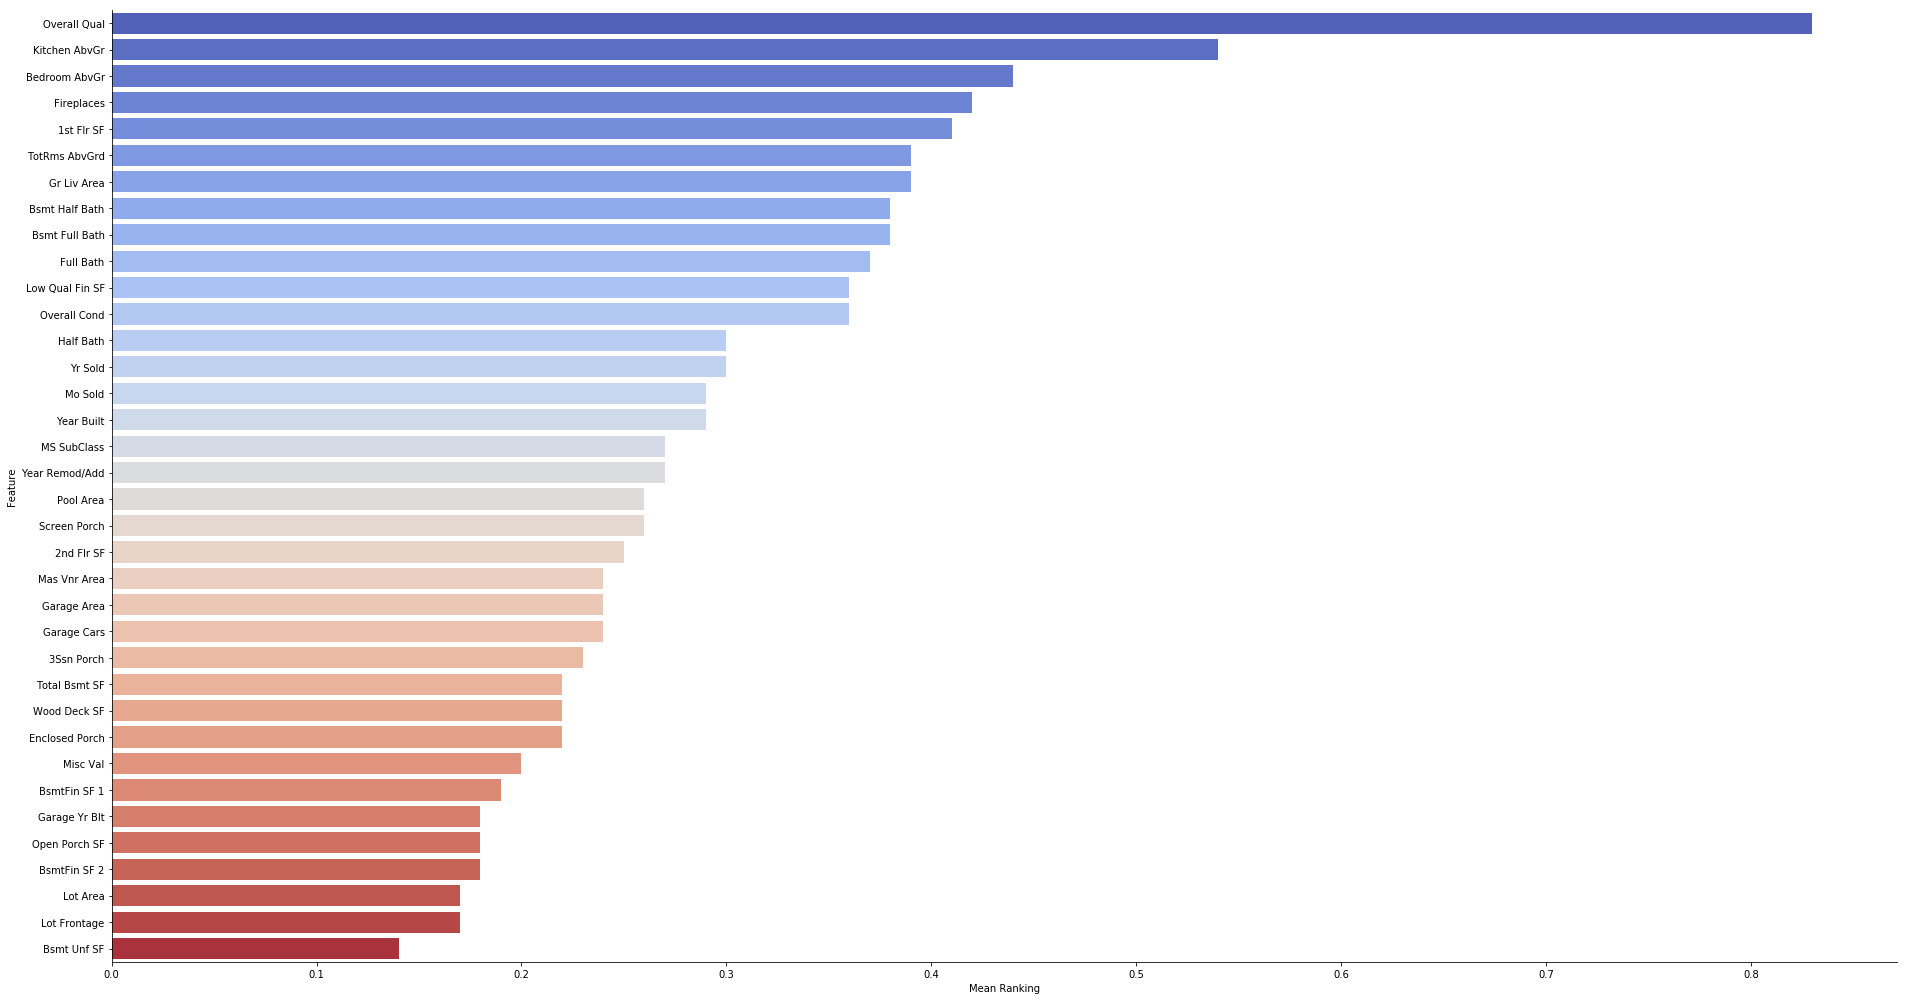

In [49]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')